**Анализ личности покупателя. Кластеризация**

In [149]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns; sns.set(style='white')
from mpl_toolkits.mplot3d import Axes3D

In [150]:
df = pd.read_csv('./marketing_campaign.csv', sep="\t")

In [151]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [153]:
df['Age'] = 2021 - df['Year_Birth']

- The newest customer's enrolment date in therecords: 2014-12-06
- The oldest customer's enrolment date in the records: 2012-01-08

In [154]:
import datetime
from datetime import date

In [155]:
last_date = date(2014,12,6)

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)

df["Customer_For"] = pd.to_numeric(df["Dt_Customer"].dt.date.apply(lambda x: (last_date - x)).dt.days, 
                                   downcast="integer")

In [156]:
df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [157]:
df["Marital_Status"] = df["Marital_Status"].replace({
     'Divorced':'Single', 
     'Single':'Single', 
     'Alone':'Single',
     'Widow':'Single', 
     'Absurd':'Single', 
     'YOLO':'Single',
     'Married':'Married',
     'Together':'Married'
})

In [158]:
df["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [159]:
df["Education"] = df["Education"].replace({
    'Basic':'Undergraduate', 
    '2n Cycle':'Undergraduate', 
    'Graduation':'Postgraduate', 
    'Master':'Postgraduate', 
    'PhD':'Postgraduate'
})

In [160]:
df["Children"] = df["Kidhome"] + df["Teenhome"]
df["Has_Child"] = np.where(df.Children > 0, 1, 0)

In [161]:
df = df.rename(columns={
    'MntWines': 'Wines', 
    'MntFruits':'Fruits',
    'MntMeatProducts':'Meat', 
    'MntFishProducts':'Fish',
    'MntSweetProducts':'Sweets', 
    'MntGoldProds':'Gold'
})

In [162]:
df["Z_CostContact"].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [163]:
df["Z_Revenue"].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [164]:
drop_list = ['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth']
df.drop(drop_list, axis=1 ,inplace=True)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   Wines                2240 non-null   int64  
 7   Fruits               2240 non-null   int64  
 8   Meat                 2240 non-null   int64  
 9   Fish                 2240 non-null   int64  
 10  Sweets               2240 non-null   int64  
 11  Gold                 2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [166]:
data = df.copy()

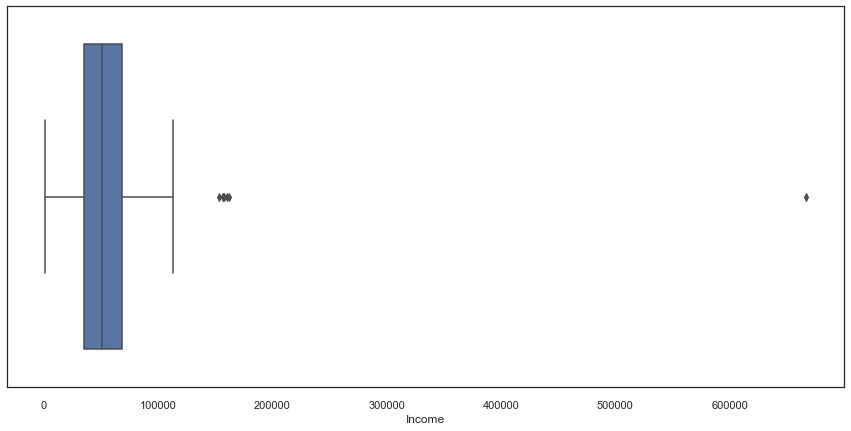

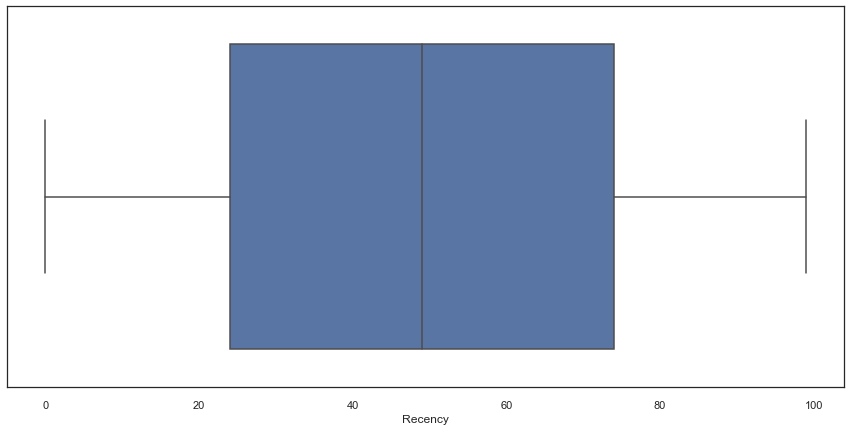

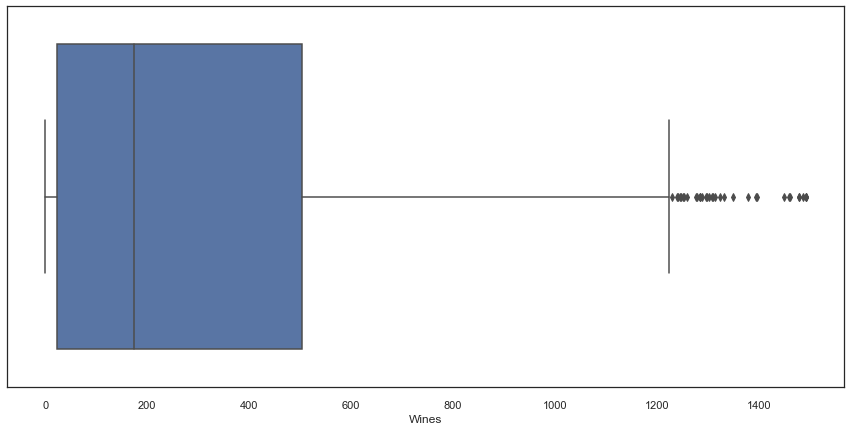

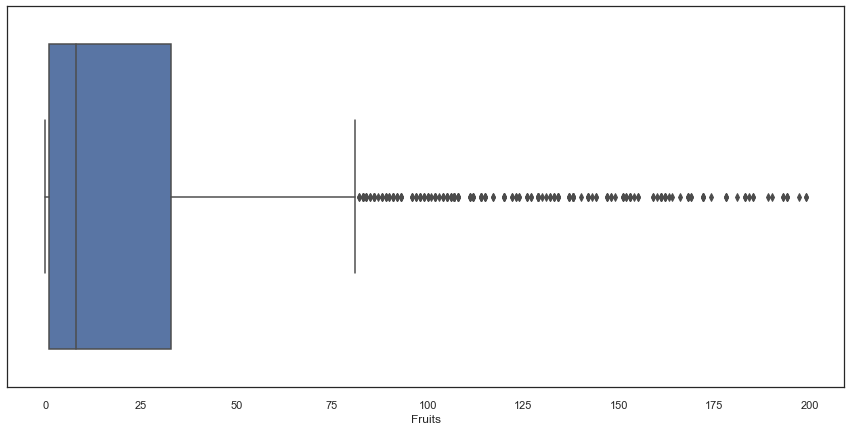

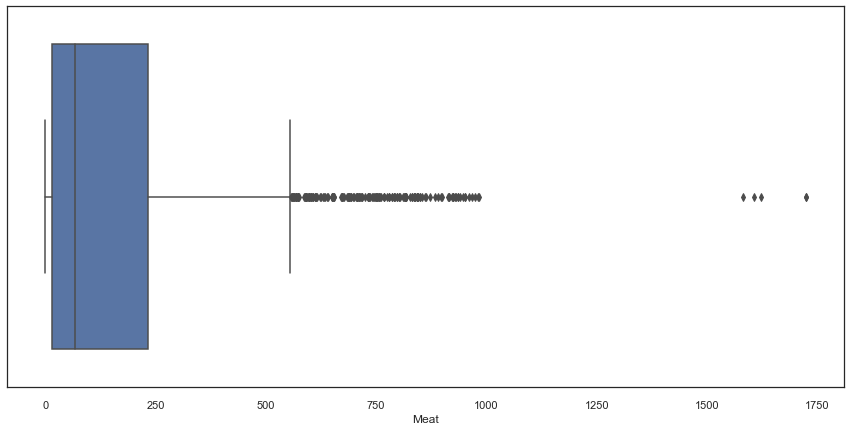

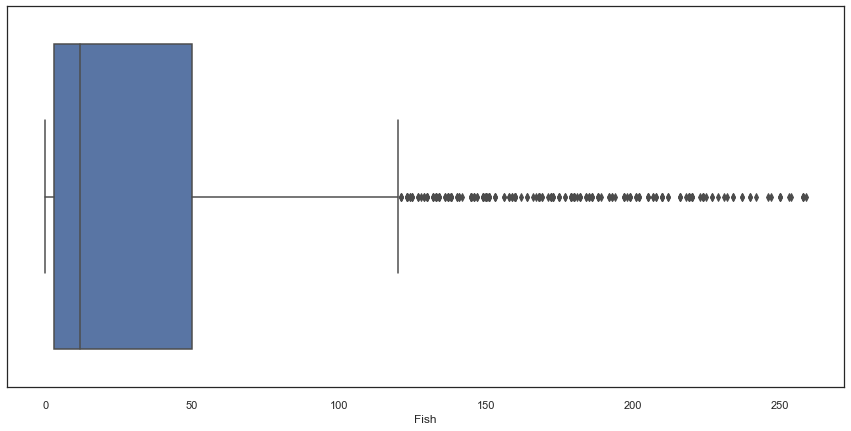

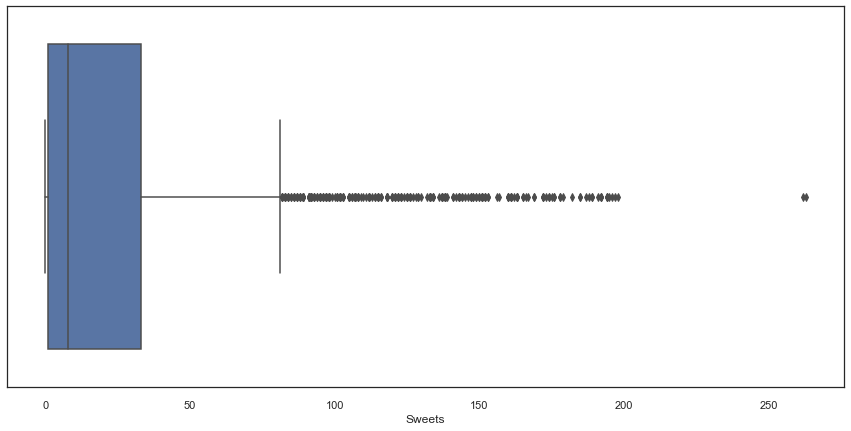

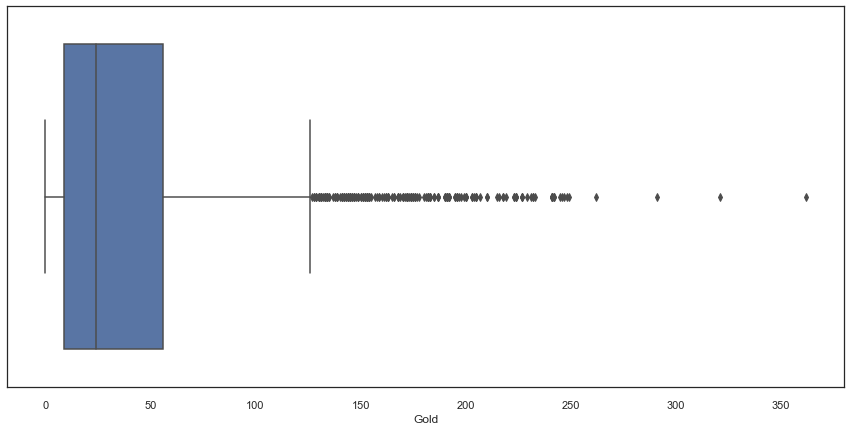

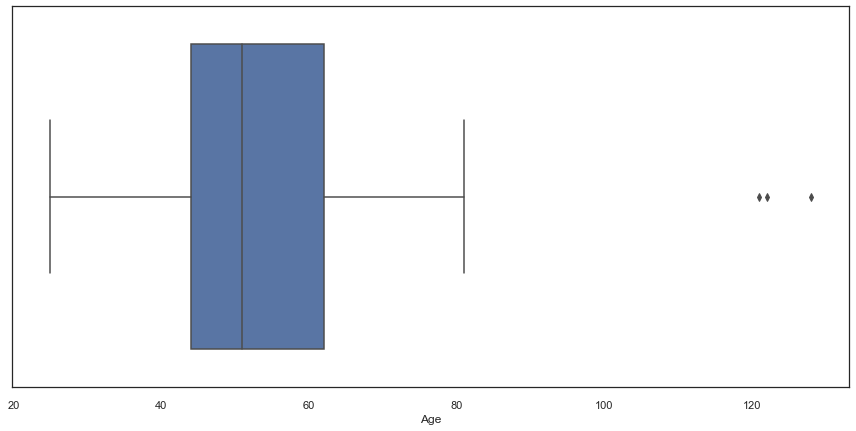

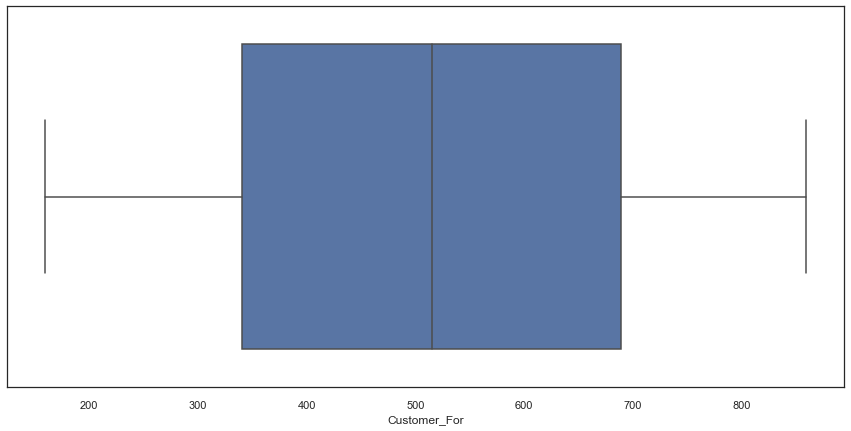

In [167]:
num_cols = [col for col in data.columns if data[col].dtype != 'O' and data[col].max() > 40]
for i in num_cols:
    plt.figure(figsize=(15,7))
    sns.boxplot(x=data[i]);
    plt.show()

In [168]:
data["Age"].value_counts().sort_index()

25      2
26      5
27      3
28      5
29     13
30     15
31     18
32     30
33     29
34     27
35     42
36     32
37     38
38     42
39     45
40     39
41     39
42     53
43     77
44     52
45     89
46     83
47     69
48     74
49     79
50     87
51     77
52     71
53     51
54     44
55     50
56     74
57     42
58     45
59     44
60     36
61     49
62     51
63     53
64     43
65     55
66     49
67     50
68     35
69     52
70     43
71     29
72     30
73     21
74     16
75     16
76      8
77      7
78      7
80      1
81      1
121     1
122     1
128     1
Name: Age, dtype: int64

In [169]:
data["Income"].value_counts().sort_index()

1730.0      1
2447.0      1
3502.0      1
4023.0      1
4428.0      1
           ..
157243.0    1
157733.0    1
160803.0    1
162397.0    1
666666.0    1
Name: Income, Length: 1974, dtype: int64

In [170]:
data = data[(data["Age"]<80)]
data = data[(data["Income"]<600000)]

In [171]:
data['Spending'] = data['Wines'] + data['Fruits'] + data['Meat'] + data['Fish'] + data['Sweets'] + data['Gold']

In [172]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2210.0,51940.597738,21519.274302,1730.0,35208.5,51371.0,68480.75,162397.0
Kidhome,2210.0,0.442081,0.537033,0.0,0.0,0.0,1.00,2.0
Teenhome,2210.0,0.506335,0.544286,0.0,0.0,0.0,1.00,2.0
Recency,2210.0,48.985520,28.932818,0.0,24.0,49.0,74.00,99.0
Wines,2210.0,304.917195,336.813541,0.0,24.0,175.5,505.00,1493.0
Fruits,2210.0,26.334389,39.756695,0.0,2.0,8.0,33.00,199.0
Meat,2210.0,166.853846,224.025798,0.0,16.0,68.0,232.00,1725.0
Fish,2210.0,37.657919,54.789723,0.0,3.0,12.0,50.00,259.0
Sweets,2210.0,27.071041,41.101525,0.0,1.0,8.0,33.00,262.0
Gold,2210.0,43.953394,51.721782,0.0,9.0,25.0,56.00,321.0


In [173]:
data = data.dropna()
data.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
Wines                  0
Fruits                 0
Meat                   0
Fish                   0
Sweets                 0
Gold                   0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Age                    0
Customer_For           0
Children               0
Has_Child              0
Spending               0
dtype: int64

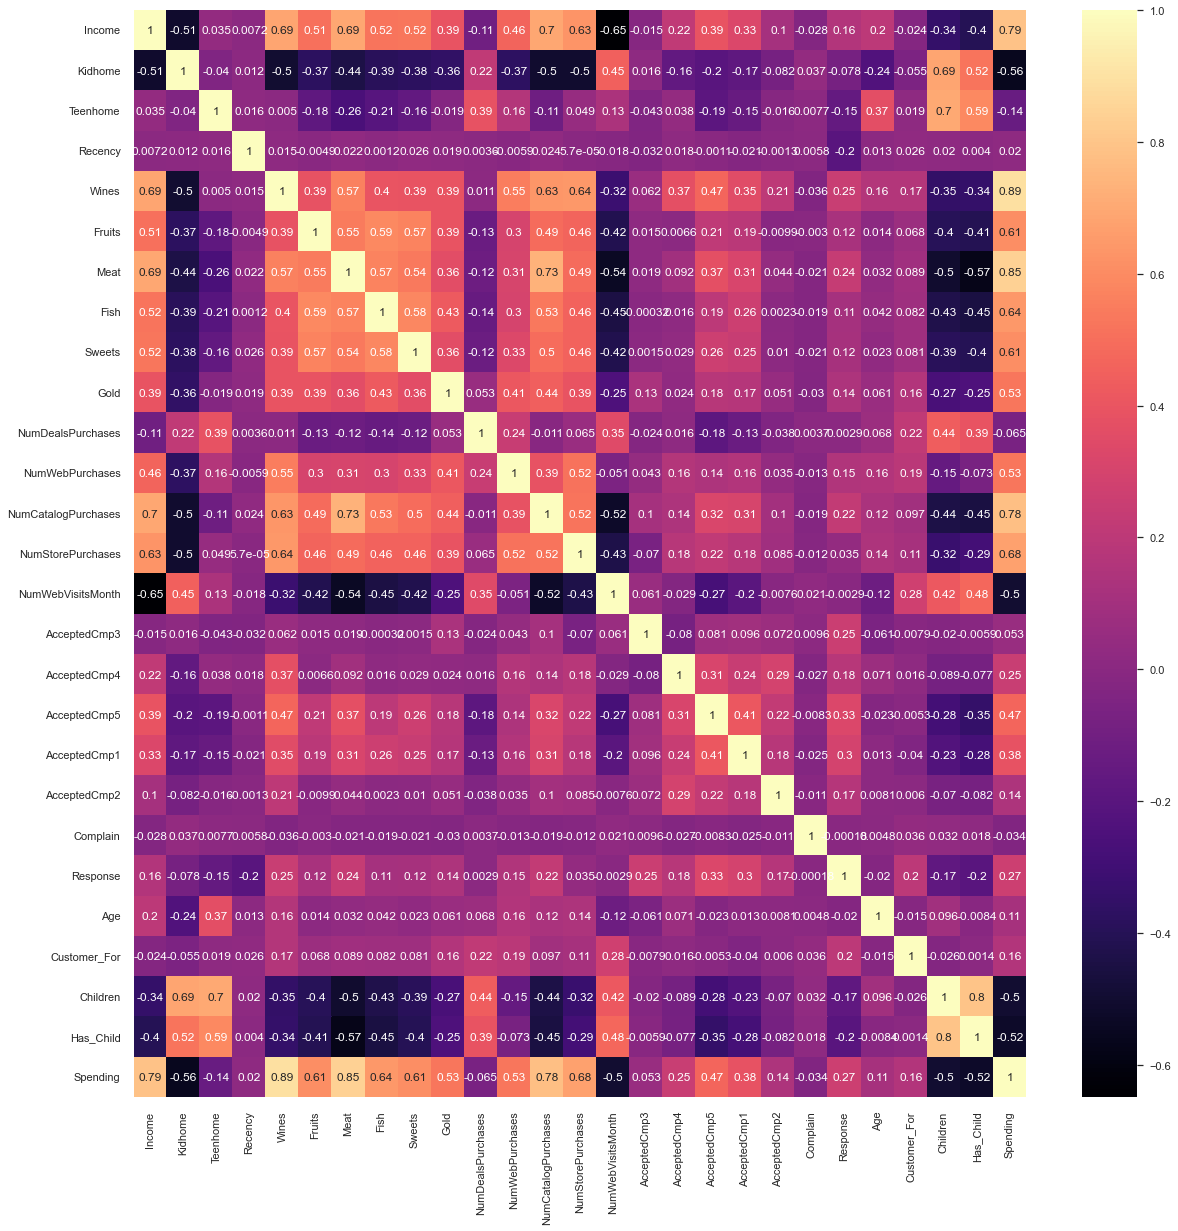

In [174]:
corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='magma');

In [175]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status']


In [176]:
from sklearn.preprocessing import LabelEncoder

In [177]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2210 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2210 non-null   int32  
 1   Marital_Status       2210 non-null   int32  
 2   Income               2210 non-null   float64
 3   Kidhome              2210 non-null   int64  
 4   Teenhome             2210 non-null   int64  
 5   Recency              2210 non-null   int64  
 6   Wines                2210 non-null   int64  
 7   Fruits               2210 non-null   int64  
 8   Meat                 2210 non-null   int64  
 9   Fish                 2210 non-null   int64  
 10  Sweets               2210 non-null   int64  
 11  Gold                 2210 non-null   int64  
 12  NumDealsPurchases    2210 non-null   int64  
 13  NumWebPurchases      2210 non-null   int64  
 14  NumCatalogPurchases  2210 non-null   int64  
 15  NumStorePurchases    2210 non-null   i

In [179]:
ds = data.copy()

In [180]:
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
            'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

In [181]:
from sklearn.preprocessing import StandardScaler

In [182]:
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

**PCA**

In [183]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2210.0,-1.107209e-16,2.815776,-5.663178,-2.579657,-0.793681,2.399926,7.549241
col2,2210.0,3.496449e-17,1.625970,-3.976959,-1.323586,-0.188440,1.219786,5.641196
col3,2210.0,3.387185e-17,1.231545,-3.541694,-0.823998,-0.006986,0.826867,5.579544


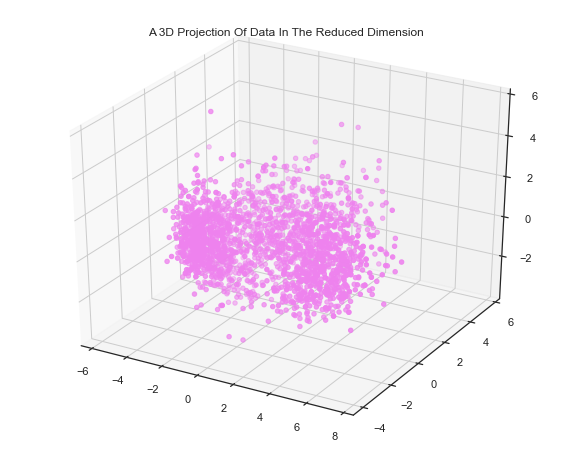

In [184]:
#A 3D Projection Of Data In The Reduced Dimension
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c='violet', marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

**KMeans**

Elbow Method to determine the number of clusters to be formed:


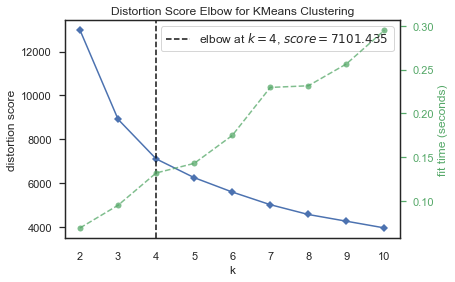

In [185]:
from yellowbrick.cluster import KElbowVisualizer

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

**AgglomerativeClustering**

In [186]:
from sklearn.cluster import AgglomerativeClustering

In [187]:
AC = AgglomerativeClustering(n_clusters=4)

yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

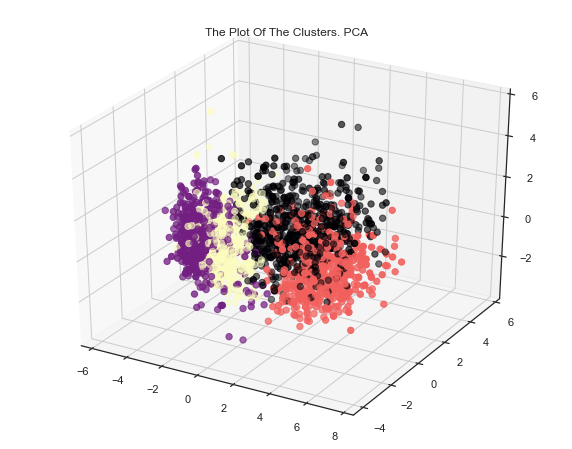

In [188]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = 'magma')
ax.set_title("The Plot Of The Clusters. PCA")
plt.show()

In [189]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))

1 component: 36.02% of initial variance
2 component: 12.01% of initial variance
3 component: 6.89% of initial variance


**KMeans**

In [190]:
from sklearn.cluster import KMeans

In [191]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(scaled_ds)
    inertia.append(np.sqrt(kmeans.inertia_))

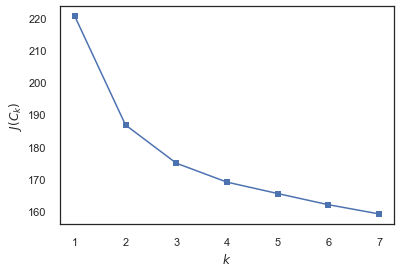

In [192]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [193]:
k_means = KMeans(n_clusters = 3,random_state = 17, n_init=100).fit(PCA_ds)
cluster_labels = k_means.predict(PCA_ds)

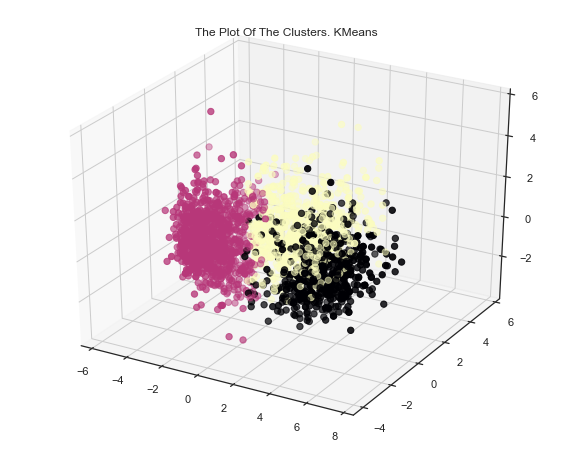

In [194]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=cluster_labels, marker='o', cmap = 'magma')
ax.set_title("The Plot Of The Clusters. KMeans")
plt.show()

**Метрики кластеризации. Силуэт**

In [195]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, SpectralClustering, AffinityPropagation
X = PCA_ds
algorithms = []
algorithms.append(KMeans(n_clusters=4, random_state=1))
algorithms.append(AffinityPropagation(random_state=1))
algorithms.append(SpectralClustering(n_clusters=4, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=4))

data_metrics = []
for algo in algorithms:
    algo.fit(X)
    data_metrics.append(({
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data_metrics, columns=['Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

,Silhouette
K-means,0.452715
Affinity,0.256633
Spectral,0.446088
Agglomerative,0.445660


In [196]:
k_means = KMeans(n_clusters = 4,random_state = 17, n_init=100).fit(PCA_ds)
cluster_labels = k_means.predict(PCA_ds)
data["Clusters"]= cluster_labels

**PCA. Выбор компонент**

In [197]:
pca = PCA(0.90, random_state=17)
X_pca = pca.fit_transform(scaled_ds)

In [198]:
len(pca.explained_variance_ratio_)

13

In [199]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))

1 component: 36.02% of initial variance
2 component: 12.01% of initial variance
3 component: 6.89% of initial variance
4 component: 5.07% of initial variance
5 component: 4.62% of initial variance
6 component: 4.52% of initial variance
7 component: 4.47% of initial variance
8 component: 3.59% of initial variance
9 component: 3.36% of initial variance
10 component: 2.94% of initial variance
11 component: 2.74% of initial variance
12 component: 2.44% of initial variance
13 component: 2.04% of initial variance


**Исследование полученных результатов**

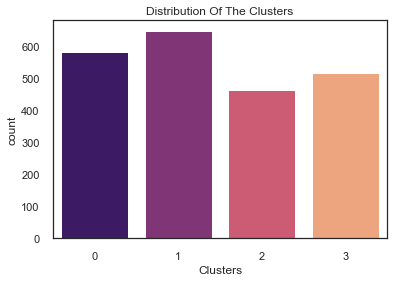

In [200]:
pl = sns.countplot(x=data["Clusters"], palette= 'magma')
pl.set_title("Distribution Of The Clusters")
plt.show()

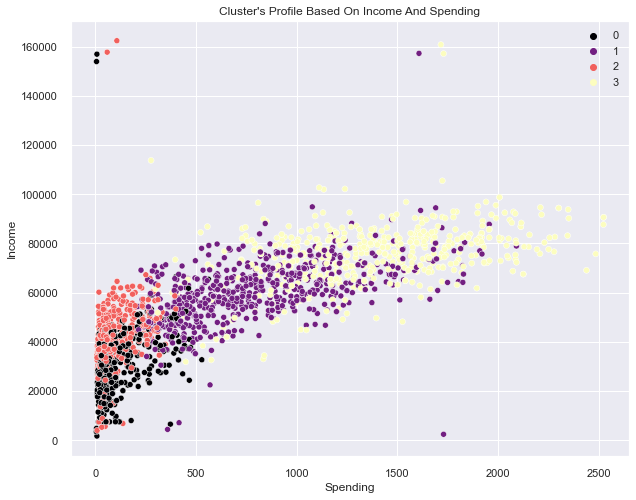

In [201]:
sns.set(rc={'figure.figsize':(10, 8)})
pl = sns.scatterplot(data = data,x=data["Spending"], y=data["Income"],hue=data["Clusters"], palette= 'magma')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


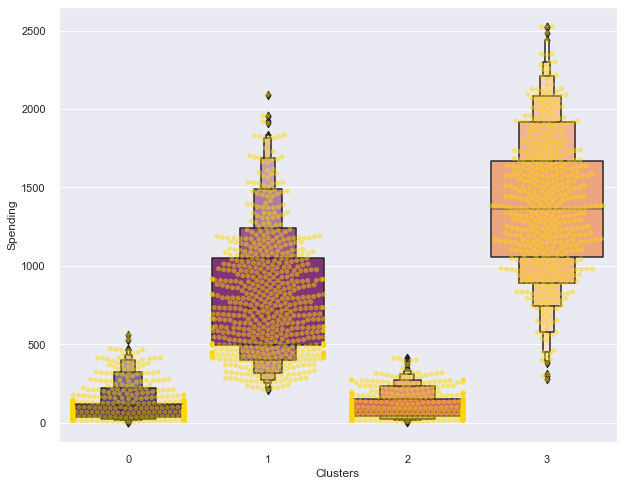

In [202]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spending"], color= "gold", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spending"], palette='magma')
plt.show()

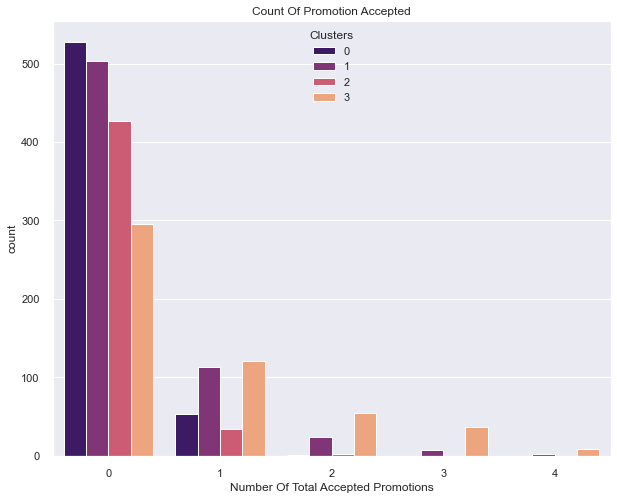

In [203]:
data["Total_Promos"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] \
        + data["AcceptedCmp4"] + data["AcceptedCmp5"]

plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette = 'magma')
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

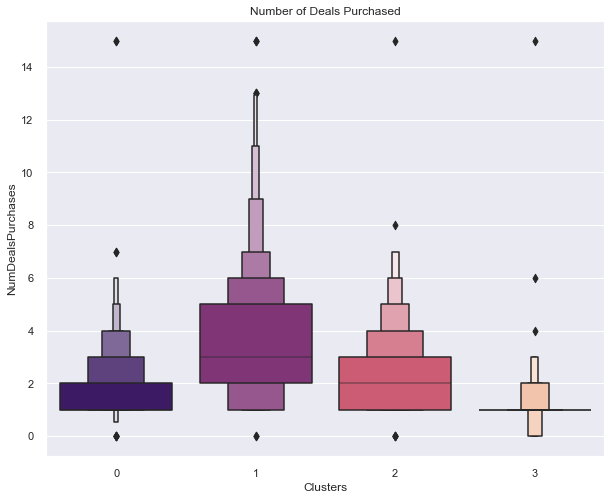

In [204]:
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= 'magma')
pl.set_title("Number of Deals Purchased")
plt.show()

In [205]:
data["Age"] = pd.cut(x=data["Age"], bins=[0,18,35,55,61,95])

In [206]:
data["Customer_For"] = pd.cut(x=data["Customer_For"], 
                              bins=np.arange(0, 
                                     data["Customer_For"].max(),
                                     data["Customer_For"].max()/4),
                              labels=["less then a year", "about a year", "more than a year"])


In [207]:
data["Marital_Status"] = data["Marital_Status"].replace({
      0 : 'Married', 
      1 : 'Single'     
})

In [208]:
data["Education"] = data["Education"].replace({
      0 : 'Postgraduate', 
      1 : 'Undergraduate'     
})

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


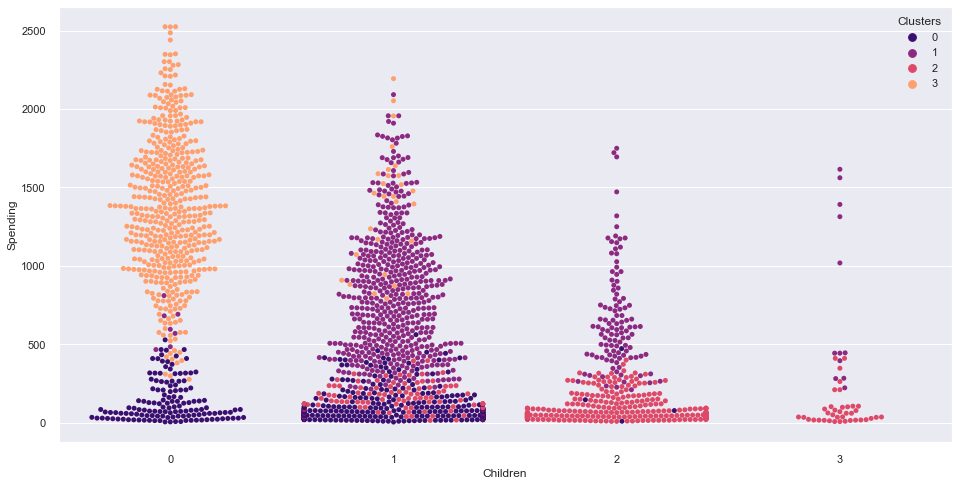

In [209]:
plt.figure(figsize=(16,8))
sns.swarmplot(x="Children", y="Spending", hue="Clusters", palette='magma' ,data=data)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 32.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


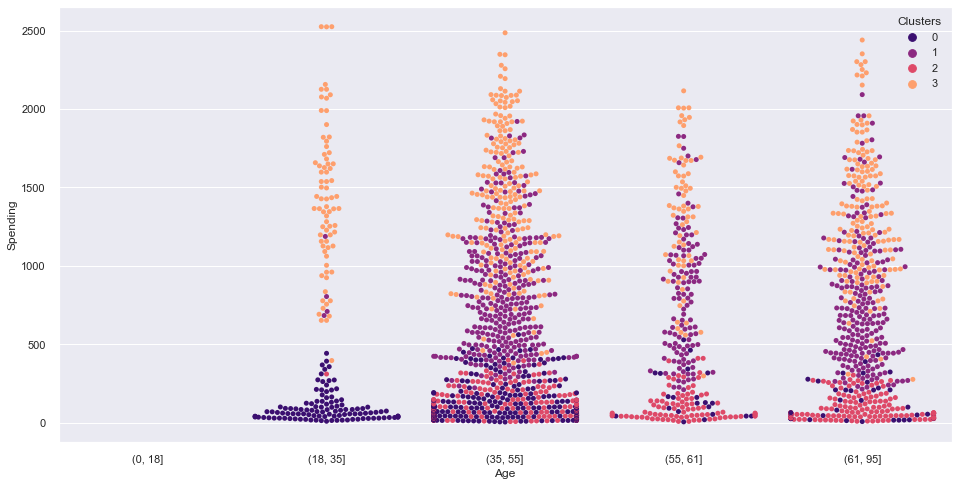

In [210]:
plt.figure(figsize=(16,8))
sns.swarmplot(x="Age", y="Spending", hue="Clusters", palette='magma' ,data=data)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


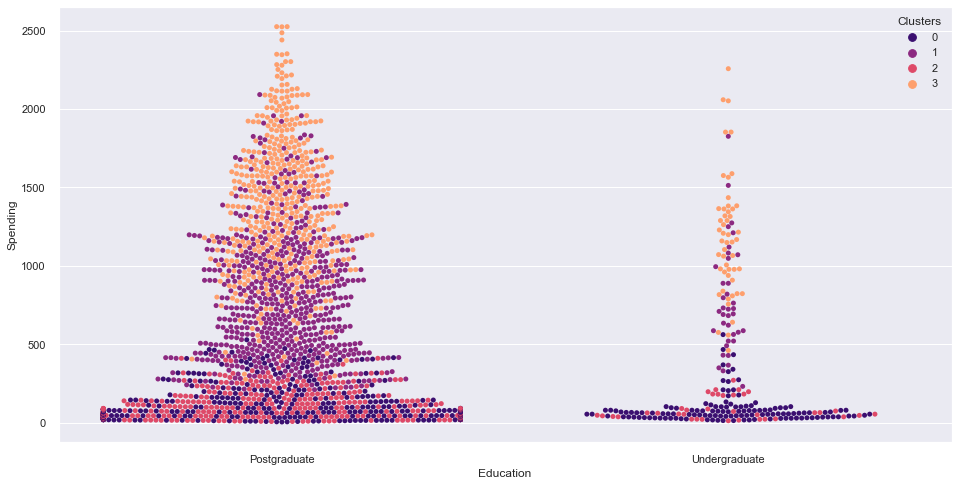

In [211]:
plt.figure(figsize=(16,8))
sns.swarmplot(x="Education", y="Spending", hue="Clusters", palette='magma' ,data=data)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


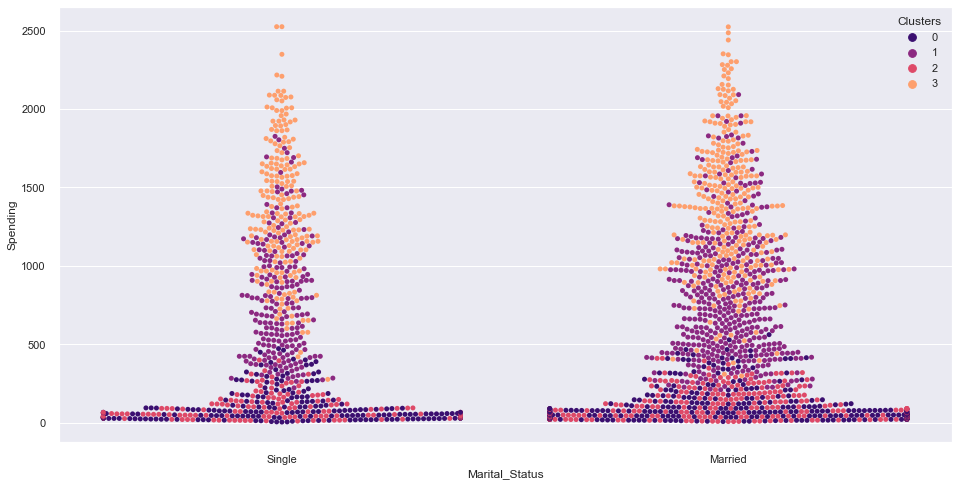

In [212]:
plt.figure(figsize=(16,8))
sns.swarmplot(x="Marital_Status", y="Spending", hue="Clusters", palette='magma' ,data=data)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


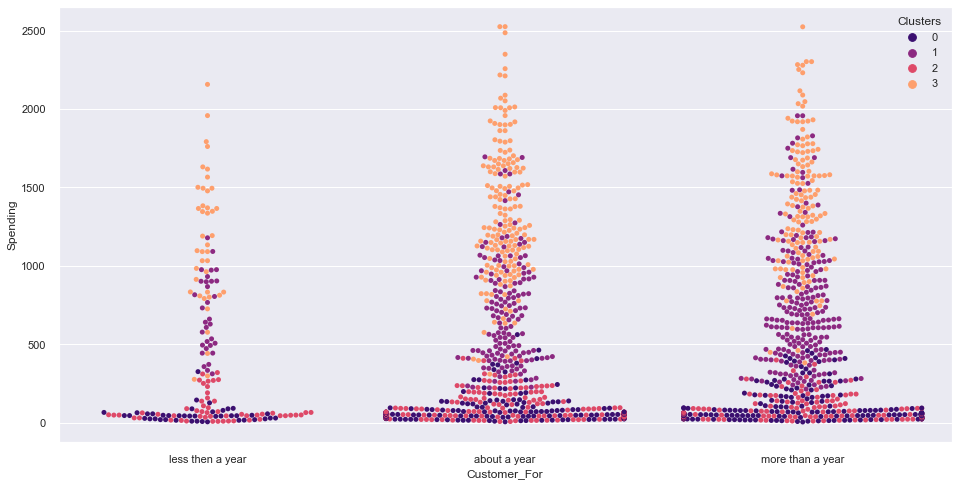

In [213]:
plt.figure(figsize=(16,8))
sns.swarmplot(x="Customer_For", y="Spending", hue="Clusters", palette='magma' ,data=data)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


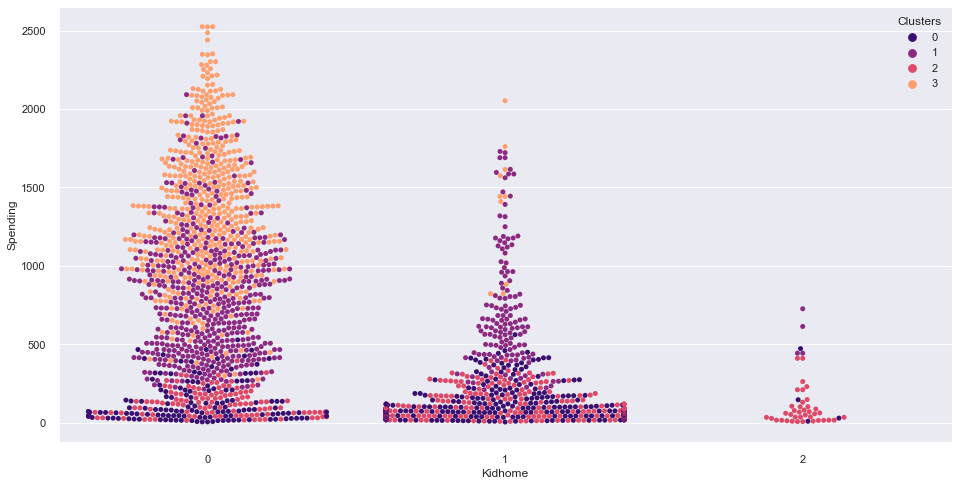

In [214]:
plt.figure(figsize=(16,8))
sns.swarmplot(x="Kidhome", y="Spending", hue="Clusters", palette='magma' ,data=data)
plt.show()

<Figure size 1152x576 with 0 Axes>

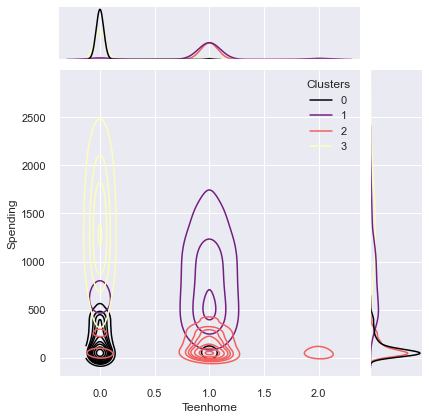

In [219]:
plt.figure(figsize=(16,8))
sns.jointplot(x="Teenhome", y="Spending", hue="Clusters", palette='magma' ,data=data, kind="kde")
plt.show()

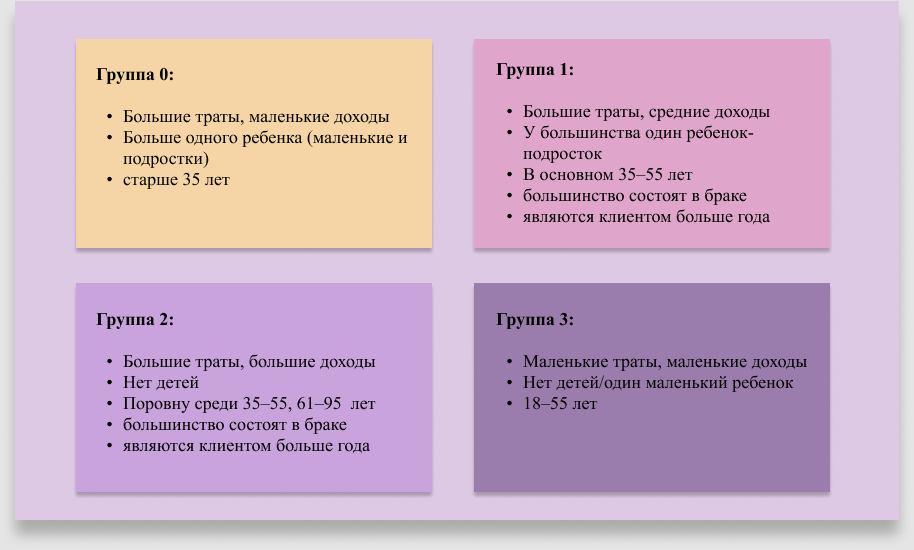

- https://www.kaggle.com/imakash3011/customer-personality-analysis
- https://www.kaggle.com/ahmetburabua/customer-personality-analysis-clustering
- https://www.kaggle.com/viannaandresouza/customer-segmentation-clustering